## Investigate Source Datasets

In [3]:
# import main libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
# load and read our dataset for initial exploration - from data.world (source for Tableau dashboard)
df = pd.read_csv('https://query.data.world/s/cg3texvvmoyagywal62azempdhhyu4')

# preview our data
df.head(5)

,Date,Country_Region,Province_State,Case_Type,Cases,Difference,Prep_Flow_Runtime,Latest_Date,Lat,Long
0,3/11/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
1,3/11/2020,US,Arizona,Deaths,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
2,3/11/2020,US,Arizona,Confirmed,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
3,3/11/2020,US,Arizona,Active,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.0575,-111.6661
4,2/15/2020,US,Arizona,Recovered,0,0,3/23/2020 8:00:09 AM,3/22/2020,32.8162,-111.2845


In [5]:
# compare to alternate dataset - from ecdc
date = datetime.datetime.now()
COVID_19_URL = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"
df2=pd.read_excel(COVID_19_URL + date.strftime("%Y-%m-%d")+ ".xlsx", sep = "")

# preview  data
df2.head(5)

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-23,23,3,2020,10,0,Afghanistan,AF
1,2020-03-22,22,3,2020,0,0,Afghanistan,AF
2,2020-03-21,21,3,2020,2,0,Afghanistan,AF
3,2020-03-20,20,3,2020,0,0,Afghanistan,AF
4,2020-03-19,19,3,2020,0,0,Afghanistan,AF


In [12]:
# compare to direct link to John Hopkins timeset data
data = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
df3 = pd.read_csv(data, sep=",")

# preview our data
df3.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,19,22,22,27,29,29,29,33,35,40
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,2,2,2,3,4,10


## Investigate selected Dataset

#### Using EDCD data - because it's the most updated - the others have a one day lag

In [68]:
# making copy and renaming master file
covid = df2.copy()
covid.head(5)

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-23,23,3,2020,10,0,Afghanistan,AF
1,2020-03-22,22,3,2020,0,0,Afghanistan,AF
2,2020-03-21,21,3,2020,2,0,Afghanistan,AF
3,2020-03-20,20,3,2020,0,0,Afghanistan,AF
4,2020-03-19,19,3,2020,0,0,Afghanistan,AF


In [69]:
# sanity check
covid.shape

(6368, 8)

In [70]:
# investigating info
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 8 columns):
DateRep                      6368 non-null datetime64[ns]
Day                          6368 non-null int64
Month                        6368 non-null int64
Year                         6368 non-null int64
Cases                        6368 non-null int64
Deaths                       6368 non-null int64
Countries and territories    6368 non-null object
GeoId                        6359 non-null object
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 398.1+ KB


In [71]:
covid.describe()

,Day,Month,Year,Cases,Deaths
count,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000
mean,15.459171,2.137249,2019.989479,53.126099,2.293028
std,8.048945,1.310697,0.102041,403.562845,23.302880
min,1.000000,1.000000,2019.000000,-9.000000,0.000000
25%,9.000000,1.000000,2020.000000,0.000000,0.000000
50%,16.000000,2.000000,2020.000000,0.000000,0.000000
75%,22.000000,3.000000,2020.000000,3.000000,0.000000
max,31.000000,12.000000,2020.000000,15141.000000,795.000000


In [72]:
# checking names of countries for US and China
countries = covid['Countries and territories'].unique()
countries

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Argentina',
       'Armenia', 'Antigua_and_Barbuda', 'Algeria', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil', 'Brunei_Darussalam',
       'Bulgaria', 'Burkina_Faso', 'Cambodia', 'Cameroon', 'Canada',
       'CANADA', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech_Republic', 'Democratic_Republic_of_the_Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'French_Polynesia', 'Gabon', 'Gambia', 'G

## Clean up data

In [73]:
# find CANADA cells to investigate before deleting
covid[(covid['Countries and territories'] == 'CANADA')]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
1036,2020-03-20,20,3,2020,156,1,CANADA,CA
1037,2020-03-19,19,3,2020,121,1,CANADA,CA
1038,2020-03-18,18,3,2020,145,4,CANADA,CA


In [74]:
# replace "Canada" and "US"
covid['Countries and territories'].replace('CANADA', 'Canada', inplace=True)
covid['Countries and territories'].replace('United_States_of_America', 'US', inplace=True)

countries

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Argentina',
       'Armenia', 'Antigua_and_Barbuda', 'Algeria', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil', 'Brunei_Darussalam',
       'Bulgaria', 'Burkina_Faso', 'Cambodia', 'Cameroon', 'Canada',
       'CANADA', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech_Republic', 'Democratic_Republic_of_the_Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'French_Polynesia', 'Gabon', 'Gambia', 'G

In [75]:
# replace column name - shortening countries and territories to country, although technically not correct
covid.rename(columns={'Countries and territories':'Country'}, inplace=True)

In [76]:
# check to see whether anything is empty
covid.isna().sum()

DateRep    0
Day        0
Month      0
Year       0
Cases      0
Deaths     0
Country    0
GeoId      9
dtype: int64

In [77]:
# find those cells to investigate before deleting
covid[(covid['GeoId'].isna() == True)]

,DateRep,Day,Month,Year,Cases,Deaths,Country,GeoId
3994,2020-03-23,23,3,2020,0,0,Namibia,NaN
3995,2020-03-22,22,3,2020,0,0,Namibia,NaN
3996,2020-03-21,21,3,2020,1,0,Namibia,NaN
3997,2020-03-20,20,3,2020,0,0,Namibia,NaN
3998,2020-03-19,19,3,2020,0,0,Namibia,NaN
3999,2020-03-18,18,3,2020,0,0,Namibia,NaN
4000,2020-03-17,17,3,2020,0,0,Namibia,NaN
4001,2020-03-16,16,3,2020,0,0,Namibia,NaN
4002,2020-03-15,15,3,2020,2,0,Namibia,NaN


In [79]:
# list the GeoId to find if Namibia should be Africa
covid['GeoId'].unique()

array(['AF', 'AO', 'AL', 'AD', 'AR', 'AM', 'AG', 'DZ', 'AU', 'AT', 'AZ',
       'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BJ', 'BM', 'BT', 'BO', 'BA',
       'BR', 'BN', 'BG', 'BF', 'KH', 'CM', 'CA', 'CV', 'JPG11668', 'KY',
       'CF', 'TD', 'CL', 'CN', 'CO', 'CG', 'CR', 'CI', 'HR', 'CU', 'CY',
       'CZ', 'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER',
       'EE', 'SZ', 'ET', 'FO', 'FJ', 'FI', 'FR', 'PYF', 'GA', 'GM', 'GE',
       'DE', 'GH', 'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GY',
       'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
       'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG',
       'LV', 'LB', 'LR', 'LI', 'LT', 'LU', 'MG', 'MY', 'MV', 'MT', 'MR',
       'MU', 'MX', 'MD', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', nan,
       'NP', 'NL', 'AN', 'NC', 'NZ', 'NI', 'NE', 'NG', 'MK', 'NO', 'OM',
       'PK', 'PS', 'PA', 'PG', 'PY', 'PE', 'PH', 'PL', 'PT', 'QA', 'RO',
       'RU', 'RW', 'LC', 'VC', 'SM', 'SA', 'SN', 'R

In [82]:
# checking what is listed under GeoId='AF'
africa = covid[(covid['GeoId']=='AF')]
africa

,DateRep,Day,Month,Year,Cases,Deaths,Country,GeoId
0,2020-03-23,23,3,2020,10,0,Afghanistan,AF
1,2020-03-22,22,3,2020,0,0,Afghanistan,AF
2,2020-03-21,21,3,2020,2,0,Afghanistan,AF
3,2020-03-20,20,3,2020,0,0,Afghanistan,AF
4,2020-03-19,19,3,2020,0,0,Afghanistan,AF
...,...,...,...,...,...,...,...,...
69,2020-01-04,4,1,2020,0,0,Afghanistan,AF
70,2020-01-03,3,1,2020,0,0,Afghanistan,AF
71,2020-01-02,2,1,2020,0,0,Afghanistan,AF
72,2020-01-01,1,1,2020,0,0,Afghanistan,AF


In [88]:
# well, that's not what I had thought! I needed to trial and error this part!
# if the Country is labeled Namibia, relabel the GeoId as "NA" rather than "NaN" in GeoId
covid['GeoId'].replace(covid[(covid['Country']=='Namibia')]['GeoId'],'NA', inplace=True)

In [89]:
# Check again
covid.isna().sum()

DateRep    0
Day        0
Month      0
Year       0
Cases      0
Deaths     0
Country    0
GeoId      0
dtype: int64

## Analysis

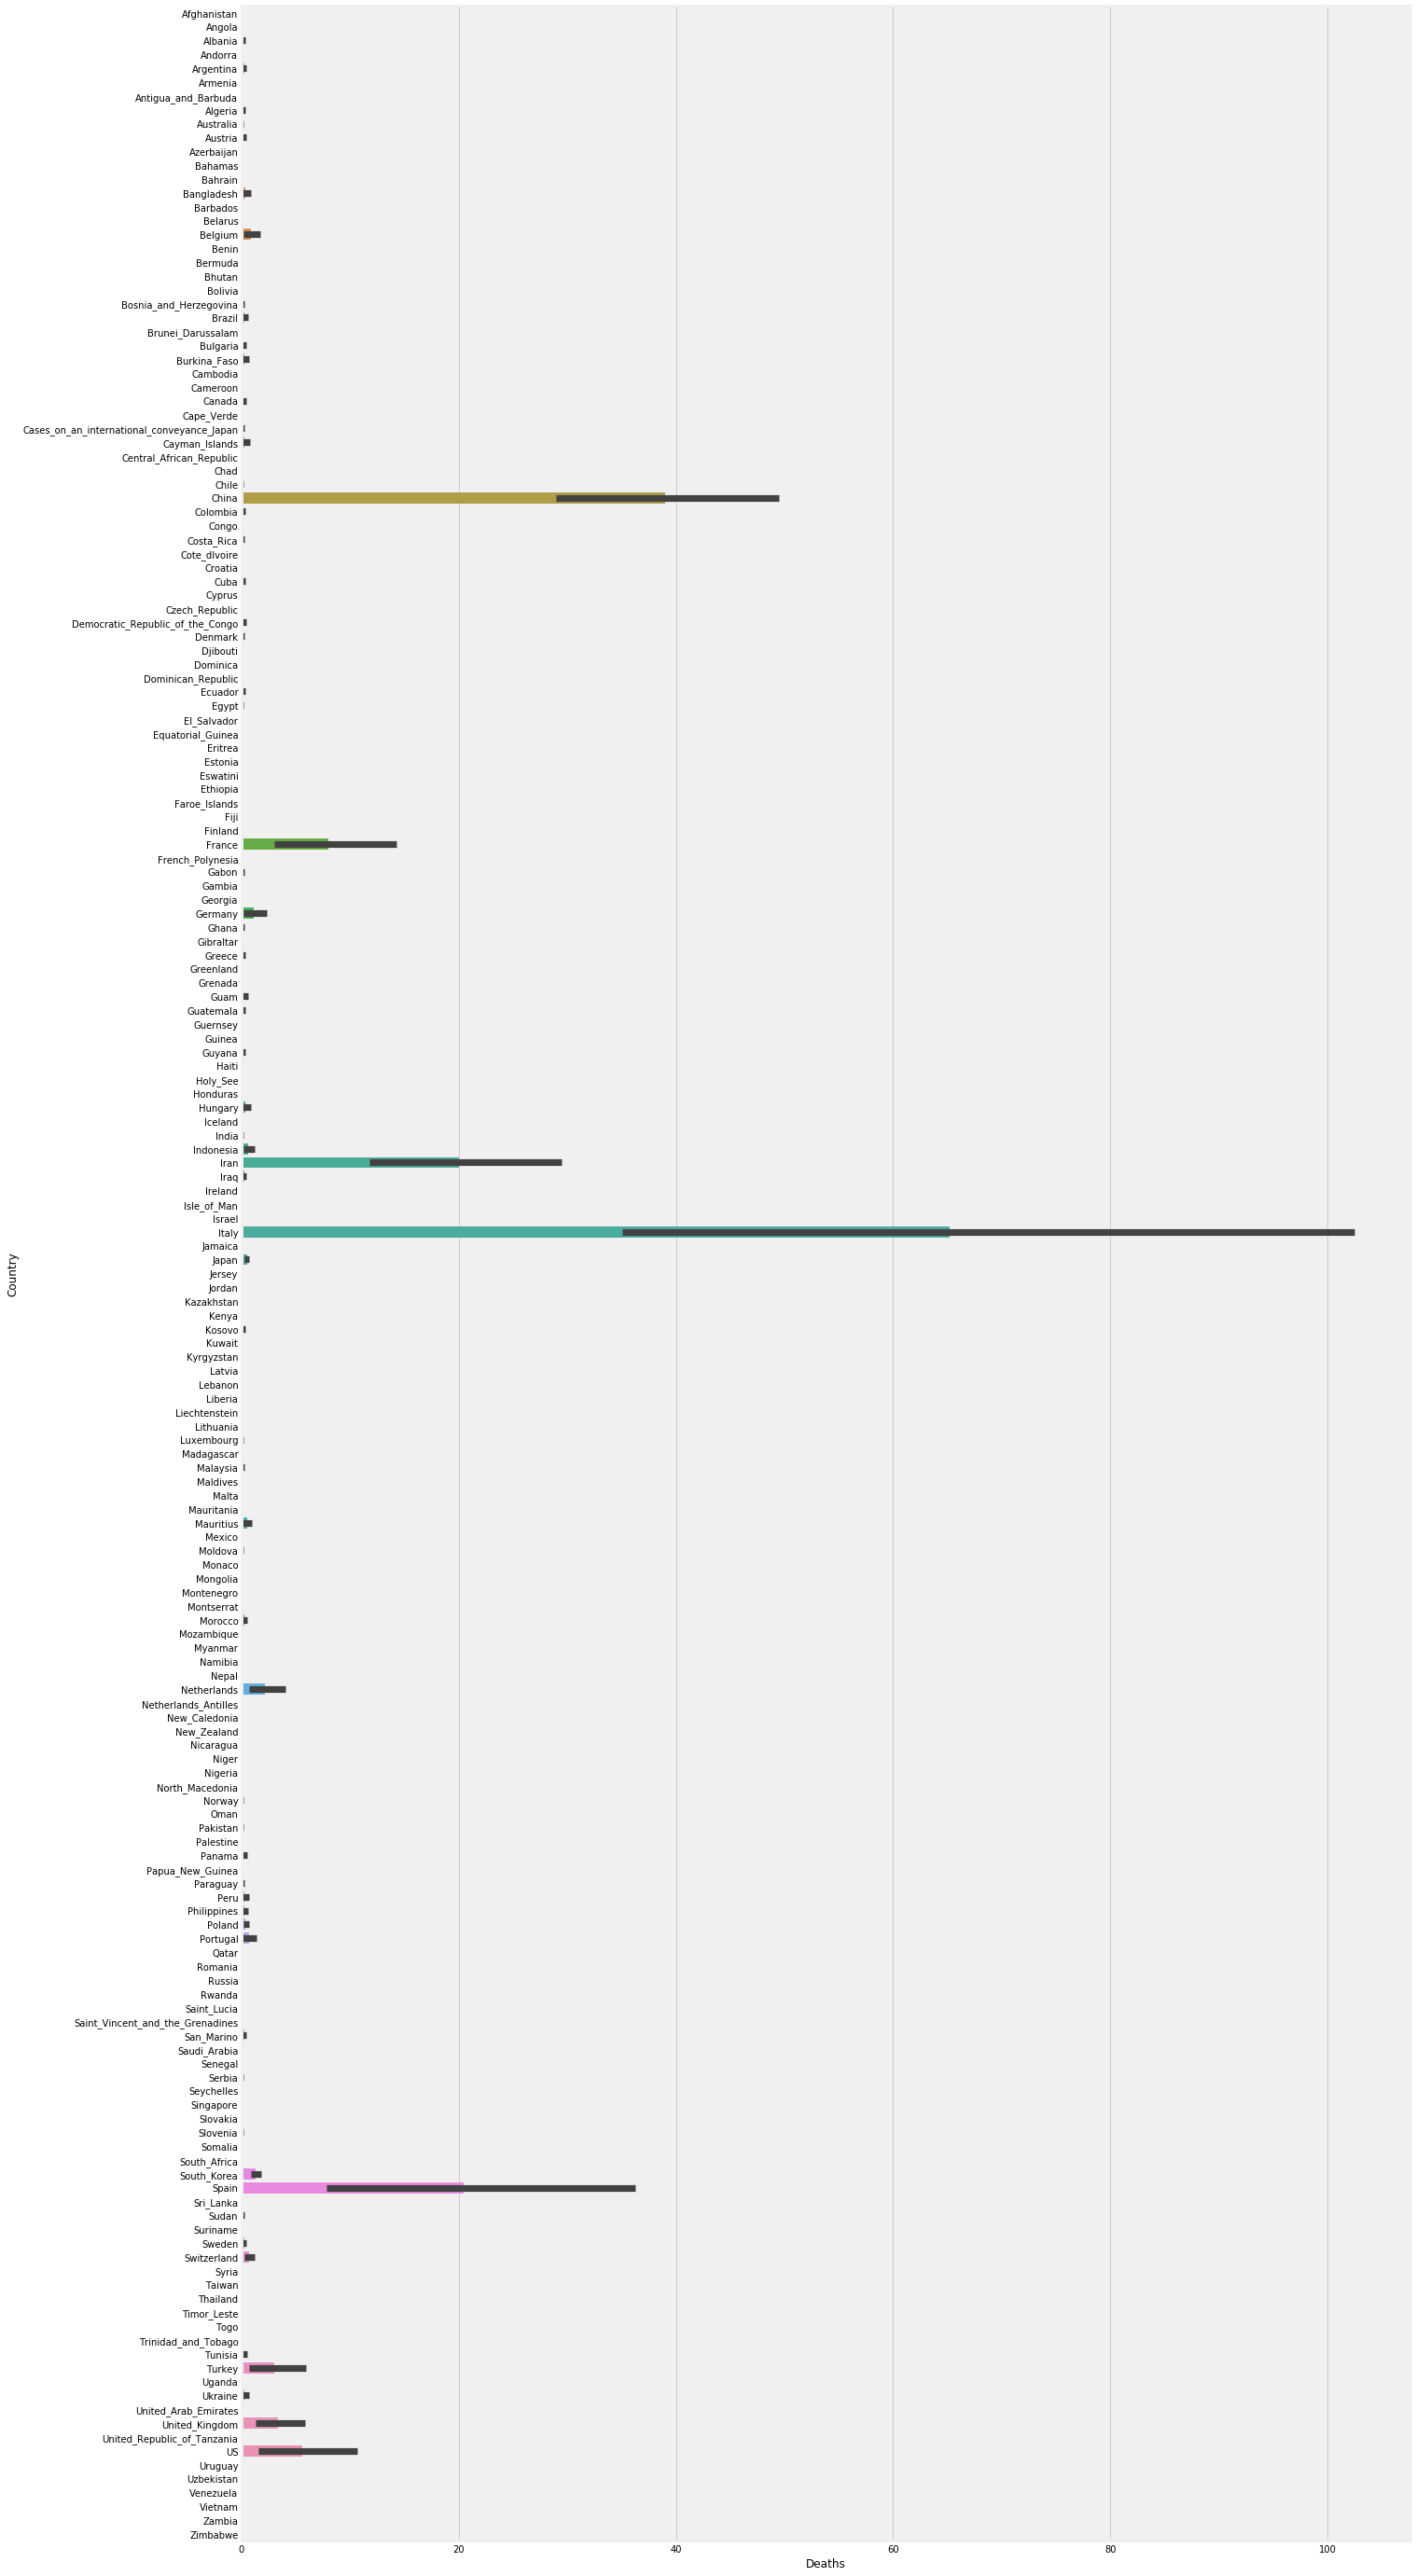

In [101]:
# Barplot of countries
plt.figure(figsize = (20,50))
sns.barplot(x="Deaths", y="Country", data=covid)

Well, that didn't work. There's too many countries and all have logarthmic death rates.  I think I'll take a look at the maximum number of deaths by country first.


In [116]:
# current date = max date
date = covid['DateRep'].max()
date

Timestamp('2020-03-23 00:00:00')

In [118]:
# Create new df by country - based on current date
# if it's the current date, then sum by country
current = covid[(covid['DateRep'] == date)]
current

,DateRep,Day,Month,Year,Cases,Deaths,Country,GeoId
0,2020-03-23,23,3,2020,10,0,Afghanistan,AF
74,2020-03-23,23,3,2020,0,0,Angola,AO
76,2020-03-23,23,3,2020,13,0,Albania,AL
91,2020-03-23,23,3,2020,25,0,Andorra,AD
101,2020-03-23,23,3,2020,41,0,Argentina,AR
...,...,...,...,...,...,...,...,...
6263,2020-03-23,23,3,2020,13,0,Uzbekistan,UZ
6271,2020-03-23,23,3,2020,0,0,Venezuela,VE
6280,2020-03-23,23,3,2020,24,0,Vietnam,VN
6360,2020-03-23,23,3,2020,1,0,Zambia,ZM


In [122]:
# Drop extra columns for deaths
deaths = current.drop(['Day', 'Month', 'Year', 'Cases', 'GeoId'], axis = 1) 

In [127]:
# sort deaths (descending)
deaths.sort_values(by=['Deaths'], inplace=True, ascending=False)

In [144]:
# deaths by top 20 countries 
deaths.head(20)

,DateRep,Deaths,Country
3096,2020-03-23,649,Italy
5440,2020-03-23,394,Spain
6170,2020-03-23,131,US
2764,2020-03-23,129,Iran
2072,2020-03-23,112,France
6079,2020-03-23,48,United_Kingdom
4074,2020-03-23,43,Netherlands
2258,2020-03-23,27,Germany
2687,2020-03-23,10,Indonesia
1219,2020-03-23,9,China


## Visualizations of Data

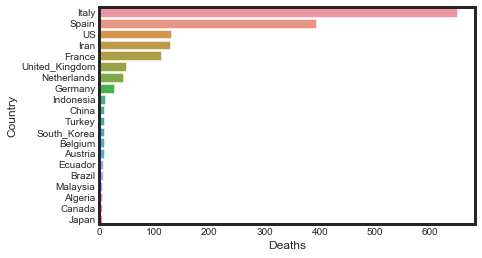

In [145]:
data=deaths.head(20)
sns.barplot(x='Deaths', y='Country', data=data)

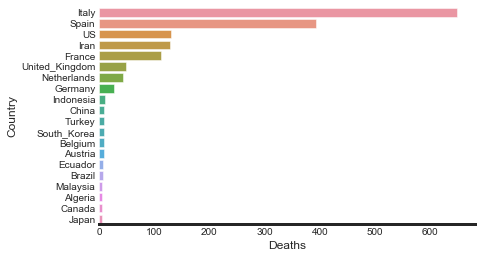

In [153]:
sns.barplot(x='Deaths', y='Country', data=data)
sns.despine(left=True)
sns.set_style('white')

# Model Construction

In [21]:
# we will need to import additional libraries in order to build our predictor model.
import time
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

## Classification Model

We will use 10 different models in order to select the optimal one for predicting if a customer will make a purchase or not in the first 90 days after a campaign is set thru different channels, sources, mediums, etc.

In [22]:
# we will test several different models in order to select the optimal
models = {'Gradient Boosting':GradientBoostingClassifier(),
          'Adaptive Boosting':AdaBoostClassifier(),
          'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
          'Logistic Regression':LogisticRegression(solver='lbfgs', multi_class='auto'),
          'Random Forest Classifier': RandomForestClassifier(n_estimators=18),
          'K Nearest Neighbour':KNeighborsClassifier(),
          'Linear SVM': SVC(gamma='scale'),
          'Decision Tree': tree.DecisionTreeClassifier(),
          'Neural Net': MLPClassifier(alpha=1),
          'Naive Bayes': GaussianNB()}

In [23]:
# set our target value and drop it from the main df
array = new_df.values
y = np.array(pd.DataFrame(new_df['purchase_90_bin']))
y = array[:,1]
X = new_df.drop(['purchase_90_bin'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# import library to help us preprocess the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# sanity check
y.shape

(50000,)

In [25]:
# sanity check
y

array([0., 0., 1., ..., 0., 0., 0.])

In [26]:
# sanity check
X.shape

(50000, 18)

In [27]:
number_cls = len(models.keys())

def classify_models(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(number_cls,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in models.items():
        time_start = time.process_time()
        classifier.fit(X_train, Y_train)
        time_end = time.process_time()
        time_diff = time_end - time_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = time_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=time_diff))
        count+=1
    return df_results

In [28]:
df_results = classify_models(X_train, y_train)

print(df_results.sort_values(by='train_score', ascending=False))

trained Gradient Boosting in 3.03 s
trained Adaptive Boosting in 0.13 s


//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


trained Linear Discriminant Analysis in 2.15 s
trained Logistic Regression in 1.20 s
trained Random Forest Classifier in 1.76 s
trained K Nearest Neighbour in 3.46 s
trained Linear SVM in 0.84 s
trained Decision Tree in 0.13 s
trained Neural Net in 20.36 s
trained Naive Bayes in 0.10 s
                     classifier  train_score  training_time
0             Gradient Boosting       1.0000       3.026566
1             Adaptive Boosting       1.0000       0.128080
3           Logistic Regression       1.0000       1.201738
4      Random Forest Classifier       1.0000       1.760518
5           K Nearest Neighbour       1.0000       3.459392
6                    Linear SVM       1.0000       0.835676
7                 Decision Tree       1.0000       0.131294
8                    Neural Net       1.0000      20.362704
9                   Naive Bayes       1.0000       0.101372
2  Linear Discriminant Analysis       0.9372       2.150442


### There seems to be overfitting in our training results, we will need to use cross validation to avoid it.

In [31]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
LR = LogisticRegression(solver='lbfgs',multi_class='multinomial')

# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# SVC
svc = SVC(gamma='scale')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=18)
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn = MLPClassifier(alpha=1)
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

###########################################

# Create a Dataframe with the results.
clf_df = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test]}

clf_results = pd.DataFrame(data=clf_df)



Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00
-----------------------------------

Accuracy of SVC classifier on training set: 1.00
Accuracy of SVC classifier on test set: 1.00
-----------------------------------

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00
-----------------------------------

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
-----------------------------------

Accuracy of Gradient Boosting classifier on training set: 1.00
Accuracy of Gradient Boosting classifier on test set: 1.00
-----------------------------------

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 1.00
-----------------------------------

Accuracy of NeuralNet classifier on training set: 1.00
Accuracy of NeuralNet classifier on test set: 1.00
------

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.94
Accuracy of LDA classifier on test set: 0.94


//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [32]:
clf_results = clf_results.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results

,Classifiers,Crossval Mean Scores,Accuracy Training Set,Accuracy Test Set
0,Logistic Reg.,1.000000,1.0000,1.00000
1,SVC,1.000000,1.0000,1.00000
2,KNN,1.000000,1.0000,1.00000
3,Dec Tree,1.000000,1.0000,1.00000
4,Grad Boosting,1.000000,1.0000,1.00000
5,Random Forest,1.000000,1.0000,1.00000
6,Neural Nets,1.000000,1.0000,1.00000
7,Naives Bayes,1.000000,1.0000,1.00000
8,Adaptive Boosting,1.000000,1.0000,1.00000
9,LDA,0.936667,0.9372,0.93912


It seems that we are still getting an overfitted result, we will need to load the original dataset and remove more dta, eiter columns or dropping NaNs since we are using the value 0 for NaN a lot.

In [33]:
# load and read our dataset for initial exploration
df = pd.read_csv('new_df.csv', sep = ',')

# preview our data
df.head(5)

,user_id,created_at,birthyear,gender,is_active,maildomain,region,orig_1,orig_2,utm_src,...,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_n,purchase_90_bin,age
0,161784,2017-06-27 19:26:51,1990,NaN,0,5910,308.0,45.0,NaN,74.0,...,7.0,31.104501,5.609922,38.011426,73.155654,-40.377089,0.340052,0.0,0,29
1,245769,2017-11-22 04:59:44,1983,NaN,0,5910,290.0,42.0,NaN,74.0,...,7.0,49.740220,2.608536,48.953180,75.468076,-24.818587,0.782523,0.0,0,36
2,140191,2017-05-16 15:52:38,1983,1.0,1,5326,308.0,15.0,NaN,67.0,...,4.0,73.959020,3.132140,38.453700,60.172579,82.574758,0.128822,5.0,1,36
3,176141,2017-07-21 10:16:49,1983,NaN,0,5326,308.0,49.0,21385.0,55.0,...,9.0,54.493092,4.176993,50.066720,36.941482,-53.010936,0.088452,0.0,0,36
4,97642,2017-02-19 07:46:55,1994,NaN,0,5326,59.0,49.0,13773.0,55.0,...,9.0,54.268673,4.419244,68.248199,40.742681,-90.132536,0.252442,0.0,0,25


In [34]:
# sanity check
df.shape

(50000, 22)

In [35]:
df.isna().sum()

user_id                0
created_at           210
birthyear              0
gender             44569
is_active              0
maildomain             0
region               173
orig_1               471
orig_2             25570
utm_src                3
utm_med                4
utm_cpg                0
channel                1
dx_0                   0
dx_1                   0
dx_2                   0
dx_3                   0
gx                     0
im                     0
purchase_90_n          0
purchase_90_bin        0
age                    0
dtype: int64

In [36]:
# drop some columns
clean_df = df.drop(['created_at','birthyear','gender','orig_2','purchase_90_n'],axis=1)
clean_df.head(5)

,user_id,is_active,maildomain,region,orig_1,utm_src,utm_med,utm_cpg,channel,dx_0,dx_1,dx_2,dx_3,gx,im,purchase_90_bin,age
0,161784,0,5910,308.0,45.0,74.0,14.0,0.0,7.0,31.104501,5.609922,38.011426,73.155654,-40.377089,0.340052,0,29
1,245769,0,5910,290.0,42.0,74.0,14.0,0.0,7.0,49.740220,2.608536,48.953180,75.468076,-24.818587,0.782523,0,36
2,140191,1,5326,308.0,15.0,67.0,5.0,0.0,4.0,73.959020,3.132140,38.453700,60.172579,82.574758,0.128822,1,36
3,176141,0,5326,308.0,49.0,55.0,13.0,0.0,9.0,54.493092,4.176993,50.066720,36.941482,-53.010936,0.088452,0,36
4,97642,0,5326,59.0,49.0,55.0,13.0,0.0,9.0,54.268673,4.419244,68.248199,40.742681,-90.132536,0.252442,0,25


In [37]:
# sanity check
clean_df.shape

(50000, 17)

In [39]:
# fill nans on channel column
clean_df['channel'].fillna(100, inplace=True)

In [41]:
# make copy just in case
clean_df_copy = clean_df.copy()

In [42]:
# drop NaNs
clean_df = clean_df.dropna(axis = 0, how ='any') 

In [44]:
# sanity check
clean_df.shape

(49354, 17)

In [45]:
clean_df.to_csv('clean_df.csv', header=True, index=False, encoding='utf-8')

In [46]:
# let's review if we still have any NaNs
clean_df.isna().sum()

user_id            0
is_active          0
maildomain         0
region             0
orig_1             0
utm_src            0
utm_med            0
utm_cpg            0
channel            0
dx_0               0
dx_1               0
dx_2               0
dx_3               0
gx                 0
im                 0
purchase_90_bin    0
age                0
dtype: int64

In [47]:
# set our target value and drop it from the main df
y_ = np.array(pd.DataFrame(clean_df['purchase_90_bin']))
y_ = y_[:,0]
X_ = clean_df.drop(['purchase_90_bin'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25, random_state=42)

# import library to help us preprocess the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
y_.shape

(49354,)

In [49]:
# sanity check
X_.shape

(49354, 16)

In [50]:
# we will use the function we made in the first clf iteration
df_results_new = classify_models(X_train, y_train)

print(df_results_new.sort_values(by='train_score', ascending=False))

trained Gradient Boosting in 11.37 s
trained Adaptive Boosting in 6.00 s
trained Linear Discriminant Analysis in 0.36 s
trained Logistic Regression in 0.86 s
trained Random Forest Classifier in 4.83 s
trained K Nearest Neighbour in 3.76 s
trained Linear SVM in 73.61 s
trained Decision Tree in 1.69 s
trained Neural Net in 31.00 s
trained Naive Bayes in 0.07 s
                     classifier  train_score  training_time
7                 Decision Tree     1.000000       1.688916
4      Random Forest Classifier     0.995975       4.833186
0             Gradient Boosting     0.880211      11.373734
5           K Nearest Neighbour     0.878806       3.759050
1             Adaptive Boosting     0.877158       5.996340
6                    Linear SVM     0.846062      73.614400
3           Logistic Regression     0.833851       0.864408
2  Linear Discriminant Analysis     0.828475       0.361448
8                    Neural Net     0.822207      30.995642
9                   Naive Bayes     0.2

### Still looks a little bit overfitted, lets try with Cross Validation on this set too.

In [51]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

###########################################

# Create a Dataframe with the results.
clf_df_2 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test]}

clf_results = pd.DataFrame(data=clf_df_2)



Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.84
-----------------------------------

Accuracy of SVC classifier on training set: 0.85
Accuracy of SVC classifier on test set: 0.85
-----------------------------------

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.83
-----------------------------------

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83
-----------------------------------

Accuracy of Gradient Boosting classifier on training set: 0.88
Accuracy of Gradient Boosting classifier on test set: 0.88
-----------------------------------

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.88
-----------------------------------

Accuracy of NeuralNet classifier on training set: 0.82
Accuracy of NeuralNet classifier on test set: 0.83
------

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.83
Accuracy of LDA classifier on test set: 0.83


In [52]:
clf_results_2 = clf_results.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results_2

,Classifiers,Crossval Mean Scores,Accuracy Training Set,Accuracy Test Set
4,Grad Boosting,0.876104,0.880211,0.880947
8,Adaptive Boosting,0.873808,0.877158,0.878839
5,Random Forest,0.868594,0.996029,0.875679
1,SVC,0.839281,0.846062,0.849907
6,Neural Nets,0.836391,0.821100,0.827215
0,Logistic Reg.,0.832662,0.833608,0.839290
9,LDA,0.828151,0.828475,0.833941
2,KNN,0.827232,0.878806,0.834508
3,Dec Tree,0.820235,1.000000,0.825675
7,Naives Bayes,0.446836,0.287964,0.275306


In [53]:
clean_df['purchase_90_bin'].unique()

array([0, 1])

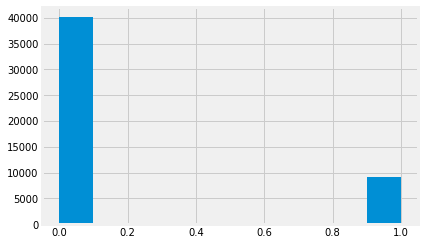

In [54]:
# explore how many purchase there really exist
plt.hist((clean_df.purchase_90_bin))
plt.show()

### We are just looking at accuracy and we are not looking at the whole picture, let's integrate precision, recall, AUC and F1 to our function so we can visualize it.

In [55]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = LR.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_hat)
precision = metrics.precision_score(y_test,y_hat,average='macro')
recall = metrics.recall_score(y_test,y_hat,average='macro')
roc_auc = roc_auc_score(y_hat,y_test)
f1_score = metrics.f1_score(y_test,y_hat,average='macro')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(precision))

print('Logistic regression Recall: {:.2f}'
     .format(recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(f1_score))

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.84
Logistic regression Precision: 0.73
Logistic regression Recall: 0.66
Logistic regression AUC: 0.73
Accuracy of Logistic regression F1 Score: 0.68


In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = cross_val_predict(LR, X_train, y_train, cv=3)
lr_accuracy = accuracy_score(y_train,y_hat)
lr_precision = precision_score(y_train,y_hat,average='macro')
lr_recall = recall_score(y_train,y_hat,average='macro')
lr_roc_auc = roc_auc_score(y_hat,y_train)
lr_f1_score = f1_score(y_train,y_hat,average='macro')


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(lr_precision))

print('Logistic regression Recall: {:.2f}'
     .format(lr_recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(lr_roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(lr_f1_score))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
y_hat = cross_val_predict(svc, X_train, y_train, cv=3)
svc_accuracy = accuracy_score(y_train,y_hat)
svc_precision = precision_score(y_train,y_hat,average='macro')
svc_recall = recall_score(y_train,y_hat,average='macro')
svc_roc_auc = roc_auc_score(y_hat,y_train)
svc_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

print('SVC Precision: {:.2f}'
     .format(svc_precision))

print('SVC Recall: {:.2f}'
     .format(svc_recall))
      
print('SVC AUC: {:.2f}'
      .format(svc_roc_auc))

print('SVC F1 Score: {:.2f}'
     .format(svc_f1_score))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)
y_hat = cross_val_predict(knn, X_train, y_train, cv=3)
knn_accuracy = accuracy_score(y_train,y_hat)
knn_precision = precision_score(y_train,y_hat,average='macro')
knn_recall = recall_score(y_train,y_hat,average='macro')
knn_roc_auc = roc_auc_score(y_hat,y_train)
knn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

print('K-NN Precision: {:.2f}'
     .format(knn_precision))

print('K-NN Recall: {:.2f}'
     .format(knn_recall))
      
print('K-NN AUC: {:.2f}'
      .format(knn_roc_auc))

print('K-NN F1 Score: {:.2f}'
     .format(knn_f1_score))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)
y_hat = cross_val_predict(dt, X_train, y_train, cv=3)
dt_accuracy = accuracy_score(y_train,y_hat)
dt_precision = precision_score(y_train,y_hat,average='macro')
dt_recall = recall_score(y_train,y_hat,average='macro')
dt_roc_auc = roc_auc_score(y_hat,y_train)
dt_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

print('Decision Tree Precision: {:.2f}'
     .format(dt_precision))

print('Decision Tree Recall: {:.2f}'
     .format(dt_recall))
      
print('Decision Tree AUC: {:.2f}'
      .format(dt_roc_auc))

print('Decision Tree F1 Score: {:.2f}'
     .format(dt_f1_score))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)
y_hat = cross_val_predict(gb, X_train, y_train, cv=3)
gb_accuracy = accuracy_score(y_train,y_hat)
gb_precision = precision_score(y_train,y_hat,average='macro')
gb_recall = recall_score(y_train,y_hat,average='macro')
gb_roc_auc = roc_auc_score(y_hat,y_train)
gb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

print('Gradient Boosting Precision: {:.2f}'
     .format(gb_precision))

print('Gradient Boosting Recall: {:.2f}'
     .format(gb_recall))
      
print('Gradient Boosting AUC: {:.2f}'
      .format(gb_roc_auc))

print('Gradient Boosting F1 Score: {:.2f}'
     .format(gb_f1_score))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
y_hat = cross_val_predict(rf, X_train, y_train, cv=3)
rf_accuracy = accuracy_score(y_train,y_hat)
rf_precision = precision_score(y_train,y_hat,average='macro')
rf_recall = recall_score(y_train,y_hat,average='macro')
rf_roc_auc = roc_auc_score(y_hat,y_train)
rf_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

print('Random Forest Precision: {:.2f}'
     .format(rf_precision))

print('Random Forest Recall: {:.2f}'
     .format(rf_recall))
      
print('Random Forest AUC: {:.2f}'
      .format(rf_roc_auc))

print('Random Forest F1 Score: {:.2f}'
     .format(rf_f1_score))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)
y_hat = cross_val_predict(nn, X_train, y_train, cv=3)
nn_accuracy = accuracy_score(y_train,y_hat)
nn_precision = precision_score(y_train,y_hat,average='macro')
nn_recall = recall_score(y_train,y_hat,average='macro')
nn_roc_auc = roc_auc_score(y_hat,y_train)
nn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

print('NeuralNet Precision: {:.2f}'
     .format(nn_precision))

print('NeuralNet Recall: {:.2f}'
     .format(nn_recall))
      
print('NeuralNet AUC: {:.2f}'
      .format(nn_roc_auc))

print('NeuralNet F1 Score: {:.2f}'
     .format(nn_f1_score))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)
y_hat = cross_val_predict(gnb, X_train, y_train, cv=3)
gnb_accuracy = accuracy_score(y_train,y_hat)
gnb_precision = precision_score(y_train,y_hat,average='macro')
gnb_recall = recall_score(y_train,y_hat,average='macro')
gnb_roc_auc = roc_auc_score(y_hat,y_train)
gnb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

print('GNB Precision: {:.2f}'
     .format(gnb_precision))

print('GNB Recall: {:.2f}'
     .format(gnb_recall))
      
print('GNB AUC: {:.2f}'
      .format(gnb_roc_auc))

print('GNB F1 Score: {:.2f}'
     .format(gnb_f1_score))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)
y_hat = cross_val_predict(ab, X_train, y_train, cv=3)
ab_accuracy = accuracy_score(y_train,y_hat)
ab_precision = precision_score(y_train,y_hat,average='macro')
ab_recall = recall_score(y_train,y_hat,average='macro')
ab_roc_auc = roc_auc_score(y_hat,y_train)
ab_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

print('AdaBoost Precision: {:.2f}'
     .format(ab_precision))

print('AdaBoost Recall: {:.2f}'
     .format(ab_recall))
      
print('AdaBoost AUC: {:.2f}'
      .format(ab_roc_auc))

print('AdaBoost F1 Score: {:.2f}'
     .format(ab_f1_score))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)
y_hat = cross_val_predict(lda, X_train, y_train, cv=3)
lda_accuracy = accuracy_score(y_train,y_hat)
lda_precision = precision_score(y_train,y_hat,average='macro')
lda_recall = recall_score(y_train,y_hat,average='macro')
lda_roc_auc = roc_auc_score(y_hat,y_train)
lda_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

print('LDA Precision: {:.2f}'
     .format(lda_precision))

print('LDA Recall: {:.2f}'
     .format(lda_recall))
      
print('LDA AUC: {:.2f}'
      .format(lda_roc_auc))

print('LDA F1 Score: {:.2f}'
     .format(lda_f1_score))

###########################################

# Create a Dataframe with the results.
clf_df_3 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test],
           'Precision':[lr_precision,svc_precision,knn_precision,dt_precision,gb_precision,rf_precision,nn_precision,gnb_precision,ab_precision,lda_precision],
           'Recall':[lr_recall,svc_recall,knn_recall,dt_recall,gb_recall,rf_recall,nn_recall,gnb_recall,ab_recall,lda_recall],
            'AUC':[lr_roc_auc,svc_roc_auc,knn_roc_auc,dt_roc_auc,gb_roc_auc,rf_roc_auc,nn_roc_auc,gnb_roc_auc,ab_roc_auc,lda_roc_auc],
           'F1 Score':[lr_f1_score,svc_f1_score,knn_f1_score,dt_f1_score,gb_f1_score,rf_f1_score,nn_f1_score,gnb_f1_score,ab_f1_score,lda_f1_score]}

clf_results = pd.DataFrame(data=clf_df_3)

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.84
Logistic regression Precision: 0.73
Logistic regression Recall: 0.65
Logistic regression AUC: 0.73
Accuracy of Logistic regression F1 Score: 0.67
-----------------------------------

Accuracy of SVC classifier on training set: 0.85
Accuracy of SVC classifier on test set: 0.85
SVC Precision: 0.75
SVC Recall: 0.64
SVC AUC: 0.75
SVC F1 Score: 0.67
-----------------------------------

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.83
K-NN Precision: 0.71
K-NN Recall: 0.67
K-NN AUC: 0.71
K-NN F1 Score: 0.69
-----------------------------------

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83
Decision Tree Precision: 0.70
Decision Tree Recall: 0.71
Decision Tree AUC: 0.70
Decision Tree F1 Score: 0.71
-----------------------------------

Accuracy of Gradient B

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.83
Accuracy of LDA classifier on test set: 0.83
LDA Precision: 0.72
LDA Recall: 0.67
LDA AUC: 0.72
LDA F1 Score: 0.69


In [59]:
# we will sort them by F1 Score
clf_results_3 = clf_results.sort_values(by=['F1 Score'], ascending=False)
clf_results_3

,Classifiers,Crossval Mean Scores,Accuracy Training Set,Accuracy Test Set,Precision,Recall,AUC,F1 Score
4,Grad Boosting,0.876104,0.880211,0.880947,0.810979,0.755992,0.810979,0.778502
8,Adaptive Boosting,0.873808,0.877158,0.878839,0.804864,0.755677,0.804864,0.776186
5,Random Forest,0.869593,0.996272,0.876975,0.804491,0.729686,0.804491,0.757521
3,Dec Tree,0.818371,1.000000,0.825351,0.704116,0.708018,0.704116,0.706023
2,KNN,0.827232,0.878806,0.834508,0.713809,0.672392,0.713809,0.688425
9,LDA,0.828151,0.828475,0.833941,0.715622,0.668831,0.715622,0.686314
0,Logistic Reg.,0.832662,0.833608,0.839290,0.728003,0.651140,0.728003,0.674525
1,SVC,0.839281,0.846062,0.849907,0.751829,0.643882,0.751829,0.671381
6,Neural Nets,0.829745,0.840686,0.843747,0.743387,0.601445,0.743387,0.622508
7,Naives Bayes,0.446836,0.287964,0.275306,0.559901,0.586554,0.559901,0.435587


<img src="confusion_matrix.png">

### We will proceed with Gradiant Boosting and Random Forest for the sake of make a confussion matrix comparison

In [63]:
# let's run Gradient Boosting again 
y_pred = cross_val_predict(gb, X_train, y_train, cv=7)

In [64]:
print('Precision Score: ', precision_score(y_train, y_pred))
print('Recall Score: ', recall_score(y_train, y_pred))
print('F1 Score:', f1_score(y_train, y_pred))

Precision Score:  0.7218072508653671
Recall Score:  0.567947247706422
F1 Score: 0.6356999598876856


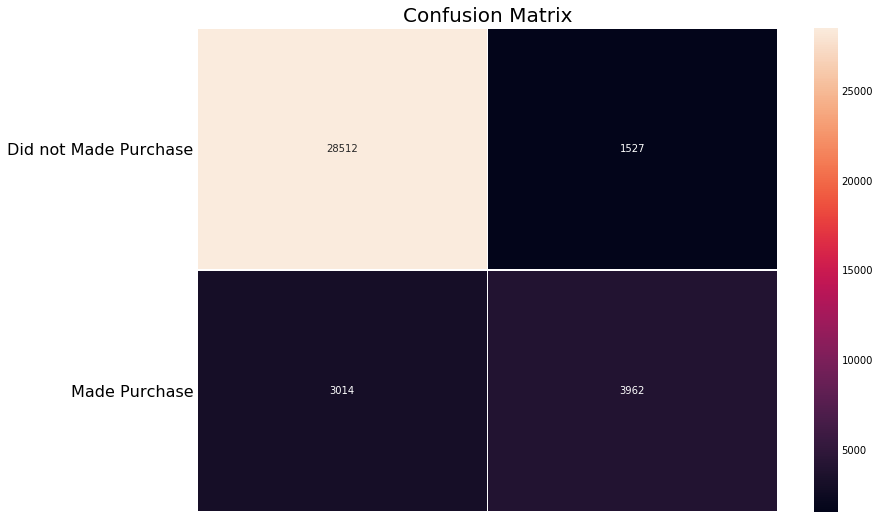

In [65]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_train, y_pred)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [66]:
# let's run Random Forest again 
y_pred_lr = cross_val_predict(rf, X_train, y_train, cv=7)

In [67]:
print('Precision Score: ', precision_score(y_train, y_pred_lr))
print('Recall Score: ', recall_score(y_train, y_pred_lr))
print('F1 Score:', f1_score(y_train, y_pred_lr))

Precision Score:  0.7138308457711443
Recall Score:  0.5141915137614679
F1 Score: 0.5977835180401633


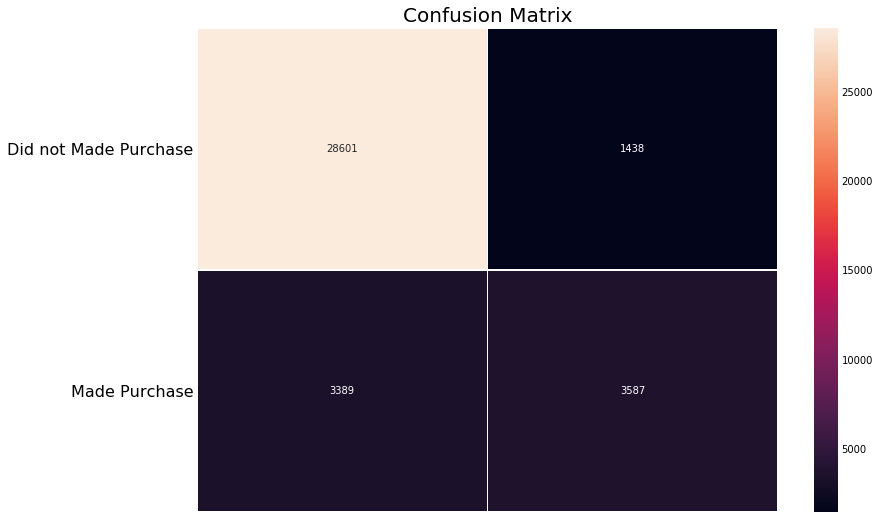

In [68]:
con_matrix = confusion_matrix(y_train, y_pred_lr)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [69]:
y_scores = cross_val_predict(rf, X_train, y_train, cv=7, method="predict_proba")

In [70]:
# sanity check
y_scores.shape

(37015, 2)

In [71]:
y_scores = y_scores[:, 1]

In [72]:
# sanity check
y_scores.shape

(37015,)

In [73]:
# How can we decide which threshold to use? 
# We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

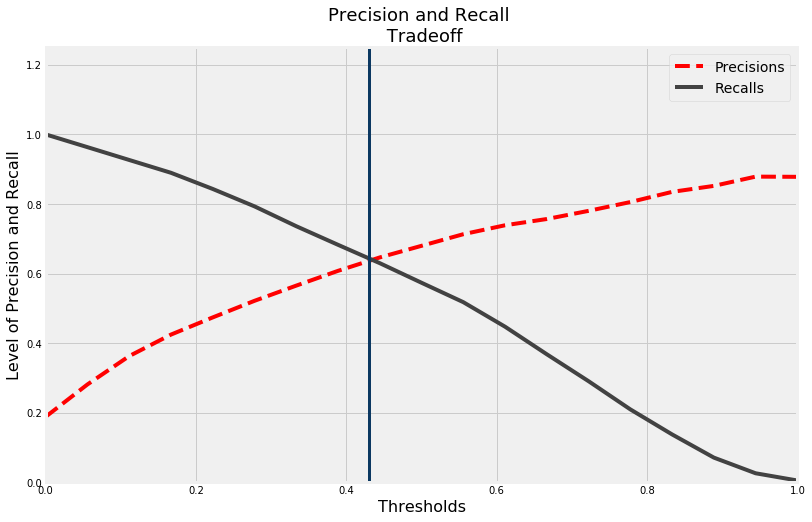

In [75]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([0, 1])
    plt.ylim([0, 1.25])
    plt.axvline(x=0.43, linewidth=3, color="#0B3861")
    
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()